In [ ]:
# ******************************* TUTORIAL 1 - SET UP TENSORFLOW AND KERAS ******************************

In [1]:
# import tensorflow and kerasl
import tensorflow as tf
from tensorflow import keras

# Import matplotlib and numpy
import matplotlib.pyplot as plt
import numpy as np


1.14.0


In [ ]:
# ***************************** TUTORIAL 2 - IMPORT THE MNIST DATASET ***********************************

In [4]:
# import the fashion mnist dataset
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
print(train_images.shape)
print(np.unique(train_labels))

(60000, 28, 28)
[0 1 2 3 4 5 6 7 8 9]


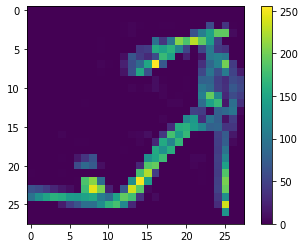

In [17]:
plt.figure()
plt.imshow(train_images[8])
plt.colorbar()
plt.show()

In [18]:
# ****************** PREPROCESS THE DATASET **********************************

In [20]:
train_images = train_images/ 255
test_images = test_images / 255

In [22]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

D:\ProgramData\Anaconda3\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


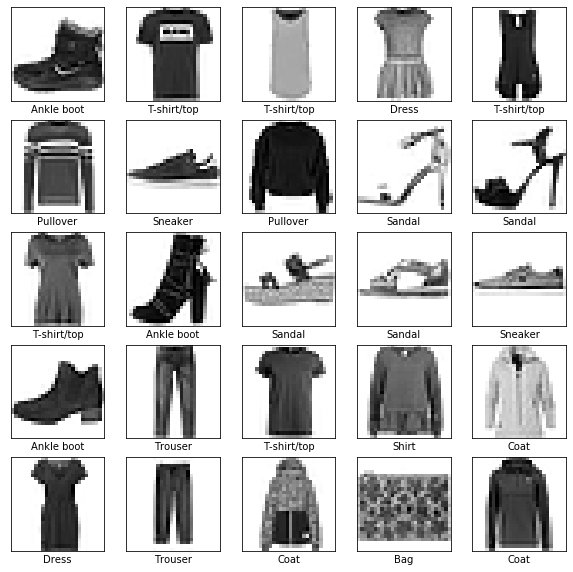

In [23]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap = plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# ******************** TUTORIAL 5 - SET UP THE LAYERS ********************************

In [27]:
# Input layer - Flatten the two dimensional array(28x28) into 1d array (28x28=784)
# Hidden layer - Dense fully connected layer of 28 nodes (relu)
# Output layer - Dense fully connected layer of 10 nodes (softmax)

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# ******************* TUTORIAL 6 - COMPILE AND OPTIMIZE THE MODEL *********************


In [28]:
# The compilation process is use to set the optimizer, loss function and metrics:
#1. Loss function - measures how accurate the output is
#2. Optimizer - measures how the model is updated
#3. Metrics - monitors the trainig to determine when to stopmodel.compile()

    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
# ******************************* TUTORIAL 7 - TRAINING THE MODEL **************************************

# We are going o train the models in 10 epochs (that is a complete presentation of the training dataset)
# This means that we would feed the 60,000 images and labes into the network 10 different time
# For each epoch we would see both the los and the accuracy of the model

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
60000/60000 [==============================] - 27s 445us/sample - loss: 0.4975 - acc: 0.8270
Epoch 2/10
60000/60000 [==============================] - 20s 336us/sample - loss: 0.3745 - acc: 0.8657
Epoch 3/10
60000/60000 [==============================] - 19s 313us/sample - loss: 0.3338 - acc: 0.8781
Epoch 4/10
60000/60000 [==============================] - 18s 301us/sample - loss: 0.3114 - acc: 0.8860
Epoch 5/10
60000/60000 [==============================] - 19s 314us/sample - loss: 0.2928 - acc: 0.8913
Epoch 6/10
60000/60000 [==============================] - 24s 400us/sample - loss: 0.2796 - acc: 0.8970
Epoch 7/10
60000/60000 [==============================] - 23s 390us/sample - loss: 0.2673 - acc: 0.9003
Epoch 8/10
60000/60000 [==============================] - 17s 290us/sample - loss: 0.2581 - acc: 0.9038
Epoch 9/10
60000/60000 [==============================] - 24s 395us/sample - loss: 0.2471 - acc: 0.9084
Epoch 10/10
60000/60000 [==============================] - 28s 4

In [31]:
test_images.shape

(10000, 28, 28)

In [33]:
# ***************************** TUTORIAL 8 - MAKE PREDICTION **********************************
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

10000/10000 [==============================] - 3s 323us/sample - loss: 0.3306 - acc: 0.8841


In [34]:
predictions = model.predict(test_images)

In [35]:
test_images.shape

(10000, 28, 28)

In [36]:
predictions.shape

(10000, 10)

In [38]:
# A prediction is an array of 10 numbers. 
# Each element represents the confidence that the image corresponds to the each of the 10
# different classes

predictions[0]

array([1.3719939e-07, 3.0358432e-10, 1.9884057e-07, 3.7327821e-11,
       2.2751689e-10, 2.1002933e-03, 3.8164407e-07, 2.0410890e-02,
       2.9359937e-06, 9.7748524e-01], dtype=float32)

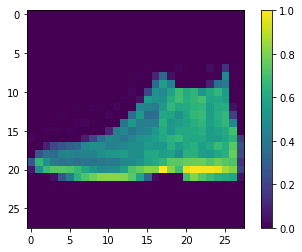

In [39]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.show()

In [70]:
# ***************************** TUTORIAL 9 - EVALUATE THE PREDICTION RESULTS(1) **********************************

# Function to Plot an image
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(img, cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

# Function to create bar plot of the predictions
def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color(color)
  thisplot[true_label].set_color('green')

NameError: name 'color' is not defined

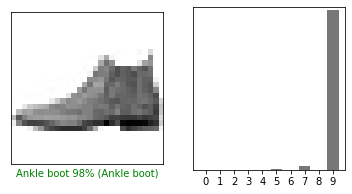

In [71]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

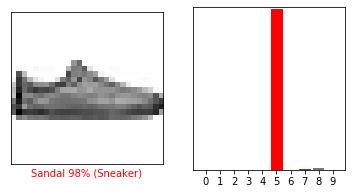

In [57]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

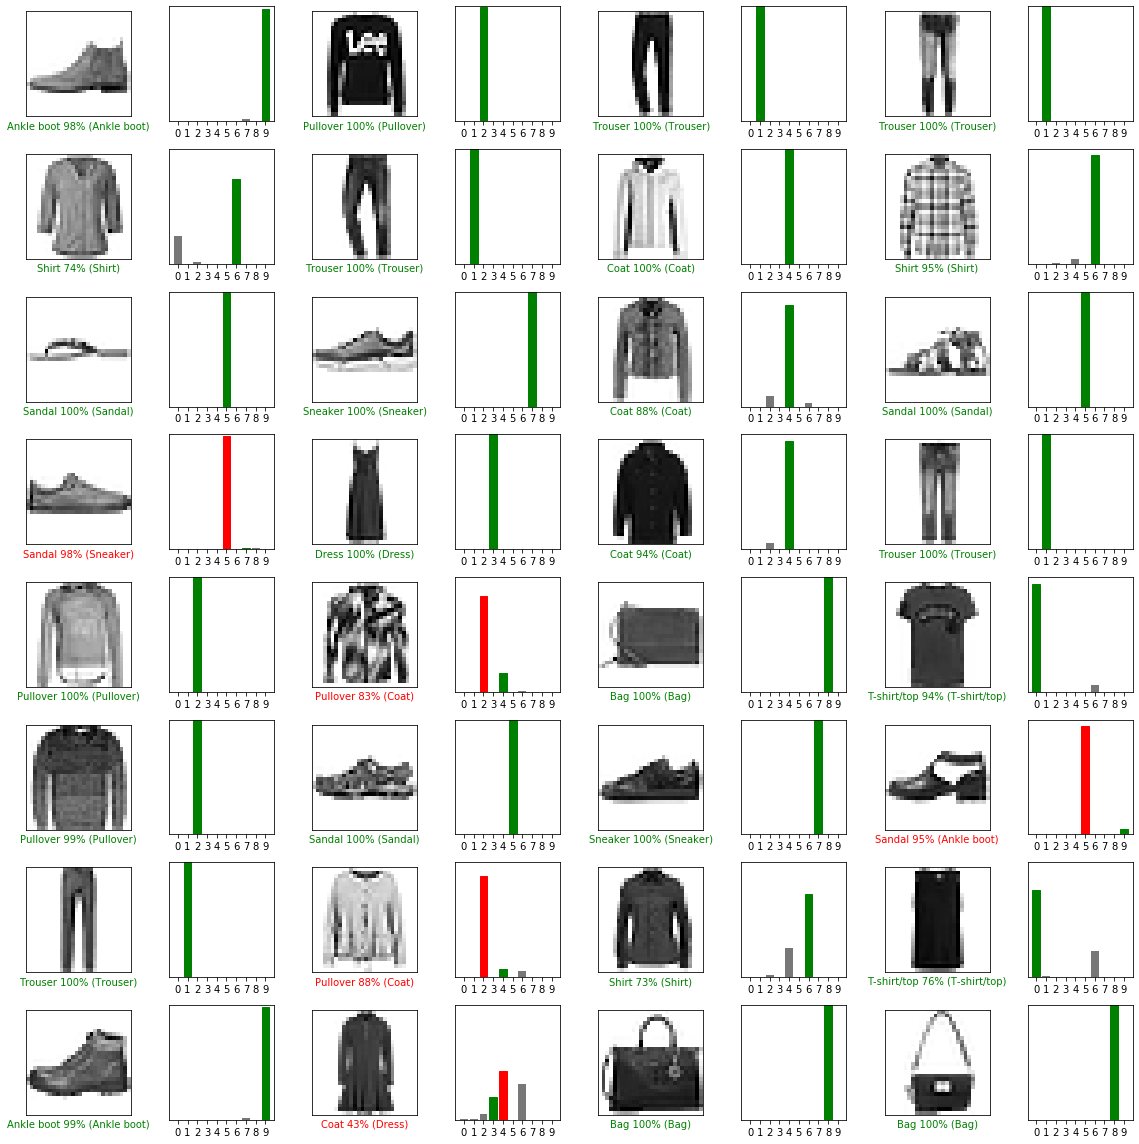

In [60]:
# ***************************** TUTORIAL 10 - EVALUATE THE PREDICTION RESULTS(2) **********************************
rows = 8
cols = 4

num_images = rows * cols
plt.figure(figsize=(2*2*cols, 2*rows))

for i in range(num_images):
  plt.subplot(rows, 2*cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(rows, 2*cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()


In [62]:
# ***************** TUTORIAL 11 - PREDICT ON A SINGLE IMAGE **********************
img = test_images[8]
img.shape

(28, 28)

In [63]:
img = (np.expand_dims(img, 0))
img.shape

(1, 28, 28)

In [64]:
my_prediction = model.predict(img)
my_prediction

array([[3.7525615e-07, 2.2806967e-08, 2.0788132e-08, 6.4796509e-08,
        1.8611772e-08, 9.9999738e-01, 1.7048592e-08, 8.2307827e-07,
        1.3181811e-06, 8.1675164e-09]], dtype=float32)

NameError: name 'color' is not defined

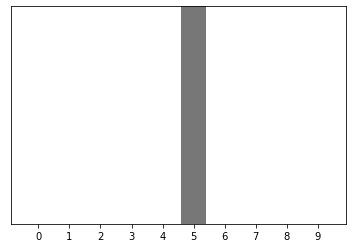

In [69]:
plot_value_array(1, my_prediction[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

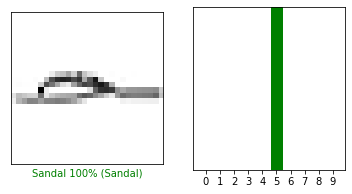

In [67]:
i = 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()